## Description of the project
* A company, hoping to increase the number of rebills and their revenue from their provided service, has decided to launch a second  way for their cutomers to cancel the service. Initially a company provided their customers only with one way of cancelling the service:

 1. The customers can cancell their service via a web form.
 
 The new way of cancelling the provided service is 
 
 2. The customers are forced to cancell their service by calling to their customer service line.


* To measure the impact of the second way of cancelling the service,  the company decided to run A/B test.

* Users were randomly placed in two separate groups. In the first group, the control group, the users could cancell their service only via a web form. In the second group, the test group, the users could cancell their service only by calling the customer service line.

* The results of the A/B test are stored in testSamples.csv file and transData.csv file.

## Part I
* Gather the data by reading the provided files into dataframes.
* Assess the data:

  - Check the first and the last lines of data.
  
  - Check the summary statistics
  
  - Check if there are duplicated rows in the data or missing values
  
* Clean the data:

  - Fix the missing data if they exist
  -  Rename the column names if needed, or the values in a column
  - Remove duplicated rows or data if they exist 
  

In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
from scipy import stats
import random
random.seed(42)
%matplotlib inline
plt.style.use("fivethirtyeight")


## Gather data

In [2]:
#Gather data
df_test=pd.read_csv('testSamples.csv')#dataframe containing sample id's and the group each
#sample has been assigned: 1->test group,0->control group

df_trans=pd.read_csv('transData.csv')

## Assess  data

In [3]:
#Check the first and the last lines of df_test
df_test.head()

,sample_id,test_group
0,1,0
1,2,1
2,3,0
3,4,1
4,5,1


In [4]:
df_test.tail()

,sample_id,test_group
59716,59717,0
59717,59718,0
59718,59719,1
59719,59720,0
59720,59721,0


In [5]:
#print the dimensions of of df_test
print(f'The number of rows is {df_test.shape[0]} and the number of columns is {df_test.shape[1]}')

The number of rows is 59721 and the number of columns is 2


In [6]:
# Let's do the same thing for df_trans
df_trans.head() #prints the first lines

,transaction_id,sample_id,transaction_type,transaction_amount
0,52346326,11,REBILL,24.95
1,52346327,11,REBILL,24.95
2,52346328,32,REBILL,29.95
3,52346329,32,REBILL,29.95
4,52346330,32,REBILL,29.95


In [7]:
df_trans.tail()

,transaction_id,sample_id,transaction_type,transaction_amount
7425,52353751,59654,REBILL,39.95
7426,52353752,59654,REBILL,39.95
7427,52353753,59689,REBILL,24.95
7428,52353754,59689,REBILL,24.95
7429,52353755,59694,REBILL,24.95


In [8]:
#print the dimensions of df_trans
print(f'The number of rows is {df_trans.shape[0]} and the number of columns is {df_trans.shape[1]}')

The number of rows is 7430 and the number of columns is 4


In [9]:
#Let's compare of number of unique sample_id from df_test and df_trans
print(f'The number of unique sample_id\'s in df_test is {df_test.sample_id.nunique()}\
 but the number of unique sample_id\'s in df_trans is {df_trans.sample_id.nunique()}')

The number of unique sample_id's in df_test is 59721 but the number of unique sample_id's in df_trans is 2714


In [10]:
#Let'check if there are missing values  in df_test. Also, we will see the dtype as well
df_test.info()# We can see below that there are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59721 entries, 0 to 59720
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   sample_id   59721 non-null  int64
 1   test_group  59721 non-null  int64
dtypes: int64(2)
memory usage: 933.3 KB


In [11]:
#Let'check if there are missing values  in df_trans. Also, we will see the dtype as well
df_trans.info()# There are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7430 entries, 0 to 7429
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   transaction_id      7430 non-null   int64  
 1   sample_id           7430 non-null   int64  
 2   transaction_type    7430 non-null   object 
 3   transaction_amount  7430 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 232.3+ KB


In [12]:
type(df_trans.loc[0,"transaction_type"])#the object dtype in transaaction_type is a string

str

In [13]:
#Let'check for duplicated rows in df_test
if (df_test.duplicated()==False).sum()==df_test.shape[0]:
    print("The dataframe does not have duplicated rows")
else:
    print('The dataframe has duplicated rows')

The dataframe does not have duplicated rows


In [14]:
#Let'check for duplicated rows in df_trans
if (df_trans.duplicated()==False).sum()==df_trans.shape[0]:
    print("The dataframe does not have duplicated rows")
else:
    print('The dataframe has duplicated rows')

The dataframe does not have duplicated rows


In [15]:
#Let's investigate the df_test further. We want to see the number of people in each group
df_test.groupby(by=['test_group']).agg({'test_group':'count'}) # control group has more people

,test_group
test_group,
0,44886
1,14835


In [16]:
#We could get the above numbers with value_counts
df_test.test_group.value_counts()

0    44886
1    14835
Name: test_group, dtype: int64

In [17]:
#Let's check how many types of transactions  in df_trans
df_trans['transaction_type'].value_counts()

REBILL        6961
REFUND         306
CHARGEBACK     163
Name: transaction_type, dtype: int64

In [18]:
#Number of unique transaction_id's in df_trans
if df_trans.transaction_id.nunique()==df_trans.shape[0]:
    print('All the transaction_ids are distinct')
else:
    print(f'The transaction_id\'s are not unique and the number of uniques id\'s is {df_trans.transaction_id.nunique()}')

All the transaction_ids are distinct


In [19]:
#Let's check some summary statistics of transaction_type and transaction_amount
df_trans[['transaction_type','transaction_amount']].describe(include='all')

,transaction_type,transaction_amount
count,7430,7430.000000
unique,3,NaN
top,REBILL,NaN
freq,6961,NaN
mean,NaN,24.935720
std,NaN,15.050653
min,NaN,-39.950000
25%,NaN,24.950000
50%,NaN,24.950000
75%,NaN,32.950000


In [20]:
#Let's check some summary statistics of transaction_amount for each group of transaction_type
df_trans.groupby(by=['transaction_type']).agg({'transaction_amount':
                                               ['mean','median','max','min']})
# We can see that the transaction amount is compatible with each group of transaction_type

transaction_amount                     
                               mean median    max    min
transaction_type                                        
CHARGEBACK               -28.103374 -24.95 -19.95 -39.95
REBILL                    28.477079  24.95  39.95  19.95
REFUND                   -27.371569 -24.95 -19.95 -39.95

## Cleaning data

* Merge df_test and df_trans on `sample_id` and call the new dataframe by df
* Copy df and call the new dataframe by df_clean
* Rename the column test_group as group. Rename the value 0 as a control group and 1 as a test group
* Change the dtype of `sample_id` to a  string
* The entries in the column `transaction_type` should be in lowercase letters
* Revisit the concept of duplicated entries

In [21]:
#Merge two dataframes
df=df_test.merge(df_trans,on='sample_id', how='inner')

In [22]:
#Copy df
df_clean=df.copy()

In [23]:
#Rename the column test_group to group
df_clean.rename(columns={'test_group':'group'},inplace=True)

In [24]:
#Rename the entries in the column group: 0->control, 1->test
df_clean.group=df_clean.group.apply(lambda x: 'control' if x==0 else 'test')

In [25]:
#Change the dtype of sample_id to str
df_clean.sample_id=df_clean.sample_id.apply(lambda x: str(x))

In [26]:
#The entries in transaction type are in lowercase letters now
df_clean.transaction_type=df_clean.transaction_type.str.lower()

### Revisit the concept of duplicate entries
 Using the code below we can see that:
 - There are `sample_id`s that have the same transaction type multiple times, for example, sample_id=5493 has 22 rebills which correspond to `transaction_id`s that differ by one
 - There are `sample_id`s that have refunds multiple times, for example sample_id=48818 has two refunds and sample_id=26099 has three chargebacks
 - There are `sample_id`s that have two or more different types of transaction
 
**Note.** There is no any reference in the provided data saying whether the data is for one billing cycle or not.

In [27]:
#Find all the sample_ids with multiple transaction types
df_clean_gby=df_clean.groupby(by=['sample_id','transaction_type']).agg({'transaction_id':'count'}).reset_index()
df_clean_gby.sort_values(by='transaction_id',ascending=False).rename(columns={'transaction_id':'count'})

,sample_id,transaction_type,count
2293,5493,rebill,22
79,11424,rebill,19
1975,49077,rebill,18
2049,50361,rebill,18
885,27713,rebill,18
...,...,...,...
1845,46612,rebill,1
798,26119,rebill,1
1843,46531,rebill,1
804,26185,rebill,1


In [28]:
#The sample_id=48818 has two refunds only
mask=df_clean['sample_id']=='48818'
df_clean.loc[mask,['sample_id','transaction_type','transaction_amount','transaction_id']]

,sample_id,transaction_type,transaction_amount,transaction_id
6018,48818,refund,-24.95,52352344
6019,48818,refund,-24.95,52352345


In [29]:
mask=df_clean['sample_id']=='5493'
df_clean.loc[mask,['sample_id','transaction_type','transaction_id']]

,sample_id,transaction_type,transaction_id
624,5493,rebill,52346950
625,5493,rebill,52346951
626,5493,rebill,52346952
627,5493,rebill,52346953
628,5493,rebill,52346954
629,5493,rebill,52346955
630,5493,rebill,52346956
631,5493,rebill,52346957
632,5493,rebill,52346958
633,5493,rebill,52346959


In [30]:
#There are  sample_ids that have two or more different transaction types
rows=df_clean_gby.rename(columns={'transaction_id':'count'}).shape[0]
if df_clean_gby.duplicated(subset=['sample_id']).sum()==0:
    print('There are no sample_ids that have two or more different transaction types')
else:
    print('There are sample_ids that have two or more different transaction types')

There are sample_ids that have two or more different transaction types


**The code below shows the `sample_ids` that have two or more different transaction types**

In [31]:
#Below you can see the sample_ids that have two or more different transaction types 
#(the ones with freq=2)
df_clean_gby.sample_id.value_counts(ascending=False)

18430    2
36640    2
29386    2
15909    2
24796    2
        ..
37512    1
30338    1
57643    1
44526    1
6041     1
Name: sample_id, Length: 2714, dtype: int64

In [32]:
#Below you can see all the sample_ids which have two ore more different transaction types and 
#along with their transaction types
mask=df_clean_gby.sample_id.value_counts(ascending=False)==2
indices=df_clean_gby.sample_id.value_counts(ascending=False).loc[mask].index.to_list()
df_clean.set_index('sample_id').loc[indices,:]

,group,transaction_id,transaction_type,transaction_amount
sample_id,,,,
18430,control,52348540,rebill,24.95
18430,control,52348541,rebill,24.95
18430,control,52348542,rebill,24.95
18430,control,52348543,rebill,24.95
18430,control,52348544,rebill,24.95
18430,control,52348545,rebill,24.95
18430,control,52348546,chargeback,-24.95
18430,control,52348547,chargeback,-24.95
36640,test,52350801,rebill,29.95


**The code below shows the `sample_ids`that have only one type of transaction**

In [33]:
mask=df_clean_gby.sample_id.value_counts(ascending=False)==1
indices=df_clean_gby.sample_id.value_counts(ascending=False).loc[mask].index.to_list()
df_clean.set_index('sample_id').loc[indices,:].reset_index()

,sample_id,group,transaction_id,transaction_type,transaction_amount
0,18657,test,52348582,rebill,24.95
1,18081,test,52348502,rebill,24.95
2,21614,control,52348945,chargeback,-32.95
3,49280,test,52352416,rebill,29.95
4,49280,test,52352417,rebill,29.95
...,...,...,...,...,...
7374,57643,test,52353548,rebill,29.95
7375,44526,control,52351836,rebill,24.95
7376,6041,test,52347052,rebill,39.95
7377,6041,test,52347053,rebill,39.95


**The code below shows the `sample_ids` that have only one type of transaction more than one time**

In [34]:
df_count=df_clean.set_index('sample_id').loc[indices,:].reset_index().groupby(
    by=['sample_id','transaction_type'])['transaction_id'].count().reset_index().rename(columns={'transaction_id':'count'})
df_count.query('count>1')

,sample_id,transaction_type,count
1,10008,rebill,5
3,10037,rebill,2
6,10099,rebill,5
7,1010,rebill,2
8,10101,refund,8
...,...,...,...
2693,9808,rebill,3
2694,9823,rebill,5
2695,9854,rebill,2
2701,9964,refund,4


**The code below shows the `sample_ids` that have multiple refunds or multiple chargebacks only**

In [35]:
df_count.query('count>1').query("(transaction_type=='refund')|(transaction_type=='chargeback')")

,sample_id,transaction_type,count
8,10101,refund,8
61,11018,refund,6
99,11684,refund,2
106,1178,refund,2
133,12365,refund,3
...,...,...,...
2561,7199,refund,5
2585,7611,refund,3
2600,7887,chargeback,5
2676,957,refund,2


**Note.** As mentioned before, there is no any information whether the data is for one billing cycle or multiple billing cycles. If it refers to one billing cycle then what is the interpretaion of the entries with multiple transactions. If the data referes to multiple billing cylces then what is the interpretation of entries thathave multiple refunds or chargebacks only. We decided to continue our analysis with the assumption that the data is for one billing cycle. As a result,we decided to clean the `df_clean` further by removing the duplicate `sample_ids` and call the resulting dataframe by `df_clean_nodup` (See the code below)

In [36]:
df_clean_nodup=df_clean.drop_duplicates(subset=['sample_id'])
df_clean_nodup.head()

,sample_id,group,transaction_id,transaction_type,transaction_amount
0,11,test,52346326,rebill,24.95
2,32,test,52346328,rebill,29.95
6,103,control,52346332,rebill,19.95
17,109,control,52346343,rebill,19.95
18,127,control,52346344,rebill,32.95


## Part II: Analyzing A/B test results
The company has posed the following questions and it is seeking to find answers to these questions:
1. What is the aproximate probability distribution between the test group and the control group?
2. Is a user that must call-in to cancel more likely to generate at least 1 addition REBILL?
3. Is a user that must call-in to cancel more likely to generate more revenues?
4. Is a user that must call-in more likely to produce a higher chargeback rate(CHARGEBACKs/REBILLs)?


### Question 1: 
What is the aproximate probability distribution between the test group and the control group?

### Answer to question 1: 
We will look at df_clean_nodup and see the proportion of sample ids in control group and  the proportion of sample ids in test group

In [37]:
df_clean_nodup.group.value_counts(normalize=True)*100

test       60.243183
control    39.756817
Name: group, dtype: float64

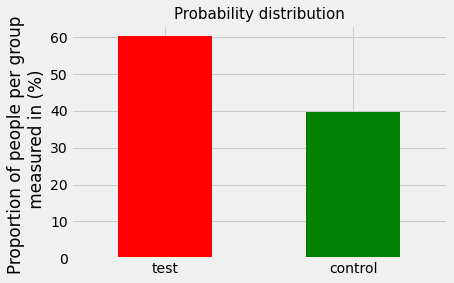

In [38]:
(df_clean_nodup.group.value_counts(normalize=True)*100).plot(kind='bar',rot=0,color=['red','green'],
                                         ylabel='Proportion of people per group \n measured in (%)')
plt.title('Probability distribution',fontsize=15);

### Question 2:

Is a user that must call-in to cancel more likely to generate at least 1 addition REBILL?

**Plan to tackle this question:**
* Come up with correct metric which will helup us answer the question
* Rephrase the question in terms of hypotheses testing
* Use statistical tools to check the hypotheses

**Note.** To answer this question, we will use statistical tools such as (bootstrap method and built-in method `proportions_ztest`)

### Answer to Question 2:
* Metric=KPI=$\frac{\text{number of rebills per group}}{\text{number of people in the group}}$.

So,

$p_{t}=\frac{\text{number of rebills in the test group}}{\text{number of people in the test group}}$.

$p_{c}=\frac{\text{number of rebills in the control group}}{\text{number of people in the control group}}$.

* Hypothesis formulation:

$H_{0}: p_{c}\geq p_{t} \hspace{2cm} H_{1}: p_{t}> p_{c} $


### Bootstrap approach

1. Compute $p_{c}$ and $p_{t}$ under $H_{0}$ i.e $p_{c}=p_{t}$

2. Compute 
   * $n_{c}=$ number of people in the control group
   * $n_{t}=$ number of people in the test group
3. Resample $n_{t}$ transactions with $p_{t}$ and $n_{c}$ transactions with $p_{c}$ 
   and compute $p_{\text{t_simul}}$ and $p_{\text{c_simul}}$ and their difference
4. Repeat the step 3 $N$ times.
5. Compute the actual diffirence between two groups and the $p$-value.
6. Draw the conclusions at the level of significance of $\alpha=0.05$ (P(Type I error))


  

In [39]:
#p_c, p_t under Ho
p_c=(df_clean_nodup['transaction_type']=='rebill').mean()
p_t=(df_clean_nodup['transaction_type']=='rebill').mean()
print(f'The probability to have rebill is {p_c} ')

The probability to have rebill is 0.9200442151805454 


In [40]:
#Compute n_c,n_t
nc=(df_clean_nodup['group']=='control').sum()
nt=(df_clean_nodup['group']=='test').sum()
print(f'The numper of people in the control group is {nc}\
 and the number of people in the test group is {nt} ')

The numper of people in the control group is 1079 and the number of people in the test group is 1635 


In [41]:
#compute pt_simul and pc_simul and their difference and then repeat the process N times
def get_psimul(test_size,control_size,N,prob):
    test_simul=np.random.choice(['rebill','norebill'],size=(test_size,N),p=[prob,1-prob])
    control_simul=np.random.choice(['rebill','norebill'],size=(control_size,N),p=[prob,1-prob])
    p_diff=(test_simul=='rebill').mean(axis=0)-(control_simul=='rebill').mean(axis=0)
    return p_diff
    

In [42]:
#compute the actual difference
act_diff=(df_clean_nodup.query('group=="test"')['transaction_type']=='rebill').mean()-(df_clean_nodup.query('group=="control"')['transaction_type']=='rebill').mean()

In [43]:
#Compute the pval with N=10000 simulations and decide whether to reject H0 or not under H0
p_diff=get_psimul(nt,nc,10000,p_t)
pval=(p_diff>act_diff).mean()
alpha=0.5
print(f'The p-value is {pval}')
if pval<alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis ')

The p-value is 0.0
We reject the null hypothesis


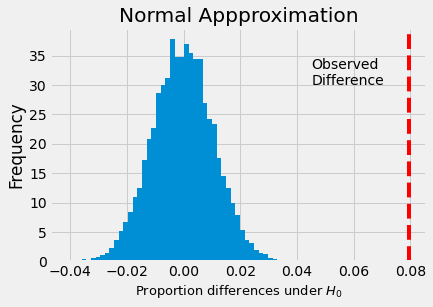

In [44]:
#Let's visualize the distribution of p_diff and see where the act_diff is placed
plt.hist(p_diff,bins=50,density=True)
plt.title("Normal Appproximation")
plt.xlabel("Proportion differences under $H_{0}$",fontsize=13)
plt.ylabel("Frequency")
plt.axvline(act_diff,color='red',ls='--')
plt.text(0.045,30,'Observed\nDifference');

We can see from the above picture that the distribution of the simulated differences of proportions is approximated very well by the Normal Distribution. This fact can be justified by the Central Limit Theorem. Also, the actual difference in proortions between two groups lies very far to the right of the bulk of the distribution of the simulated differences.

### proportions_ztest

Let's check the difference in the proportions between two groups by using the built-in method proportions_ztest

In [45]:
test_group=df_clean_nodup.query('group=="test"')['transaction_type']
control_group=df_clean_nodup.query('group=="control"')['transaction_type']
nt=test_group.shape[0] #number of people in the test group
nc=control_group.shape[0]#number of people in the control group
count=np.array([(test_group=='rebill').sum(),(control_group=='rebill').sum()]) 
# of rebills in each group
nobs=np.array([nt,nc])#of obervations in both groups
zstat,pval=proportions_ztest(count,nobs,alternative='larger')
print(f' The p-value is equal to {pval} and the z-statistic is equal to {zstat}')

 The p-value is equal to 3.702680345180694e-14 and the z-statistic is equal to 7.480476505630833


### Conclusion for Question 2:
* Both tests showed that we reject the $H_{0}$ when $\alpha=0.05$ or even when      $\alpha=0.01$. This can also be seen from our z-static computed from built-in method: zstatistic=7.48>$z_{0.05}=1.645$. Rejection of the null hypothesis means that the difference in proportions between two groups is  statisticaly significant.

* Also, we need to ask ourselves whether there is a practical significance (the actual difference in proportions is 7%)in the difference of two proportions and what the power (1-Prob(Type II error) of our test is. We will not analyze these points here.
* We could also conduct regression analysis to check our hypothesis but this path will not be taken here.

**Note.** The analysis would've been slightly different if we had adopted a different approach of cleaning the data, for example, considering duplicates only the entries
that correspond to sample ids that have only refunds  or only chargebacks more than one time.

### Question 3:

Is a user that must call-in to cancel more likely to generate more revenues?

**Plan to tackle this question:**
* Come up with correct metric which will help us answer the question
* Rephrase the question in terms of hypotheses testing
* Use statistical tools to check the hypotheses

**Note**. We will use the bootstrap approach, the built-in python stats.ttest and the linear regression approach

### Answer to Question 3:
* Metric=KPI=average of transaction amounts

So,


$a_{c}$=average of transaction amounts in the control group

$a_{t}$=average of transaction amounts in the test group

* Hypothesis formulation

$H_{0}: a_{c}\geq a_{t} \hspace{5cm} H_{1}: a_{c}<a_{t}$

### Bootstrap approach:
1. Compute the average (mean) of `transaction_amount` before placing them in the groups
2. Since we work under null hypothesis: we need to shift the transaction amounts in each group by a suitabe quantity so that the groups have the same average
3. Resample the shifted data from each group and compute the difference of $a_{c}$ and $a_{t}$
4. Repeat the step 3 for $N$ times and store $a_{t}-a_{c}$ in `av_diff`
5. Compute the actual diffirence between two groups and the $p$-value.
6. Draw the conclusions at the level of significance of $\alpha=0.05$ (P(Type I error))


In [46]:
mean=df_clean_nodup['transaction_amount'].mean()
print(f'The mean of the population is {mean}')

The mean of the population is 24.92483419307191


In [47]:
#Shift the data
a_c=df_clean_nodup.query('group=="control"')['transaction_amount'].mean()#mean of the control group
a_t=df_clean_nodup.query('group=="test"')['transaction_amount'].mean()#mean of the test group
data_c_shift=df_clean_nodup.query('group=="control"')["transaction_amount"]-a_c+mean
data_t_shift=df_clean_nodup.query('group=="test"')["transaction_amount"]-a_t+mean

 

In [48]:
def bootstrap_rep_1d(data,func):
    """This function computes the value of the function
    func at a bootstrap sample
    """
    bs_sample=np.random.choice(data,len(data))
    return func(bs_sample)
def bootstrap_reps(data,func,N):
    """This function computes the N replicates of bootstrap_rep_1d"""
    bs_replicates=np.empty(N)
    for i in range(N):
        bs_replicates[i]=bootstrap_rep_1d(data,func)
    return bs_replicates
        


In [49]:
#N=10000
replicates_test=bootstrap_reps(data_t_shift,np.mean,N=10000)
replicates_control=bootstrap_reps(data_c_shift,np.mean,N=10000)
av_diff=replicates_test-replicates_control

In [50]:
#Compute the p-value
alpha=0.05
act_diff=a_t-a_c
pval=(av_diff>act_diff).mean()
print(f'The p-value is {pval}')
if pval<alpha:
    print(f'We have enough evidence to reject the null hypothesis at the level of significance {alpha}')
else:
    print('We failed to reject the null hypothesis')

The p-value is 0.0
We have enough evidence to reject the null hypothesis at the level of significance 0.05


**Let's use the ttest to check our hypothesis**

In [51]:
test_group=df_clean_nodup.query('group=="test"')['transaction_amount']
control_group=df_clean_nodup.query('group=="control"')['transaction_amount']
statistic,pval=stats.ttest_ind(test_group,control_group,alternative='greater',
                               equal_var=False)
print(f'The p-value is {pval}')
if pval<alpha:
    print(f'We have enough evidence to reject the null hypothesis at the level of significance {alpha}')
else:
    print('We failed to reject the null hypothesis')

The p-value is 9.941724703667312e-42
We have enough evidence to reject the null hypothesis at the level of significance 0.05


**Let's visualize the distributions of transaction_amount of each group**

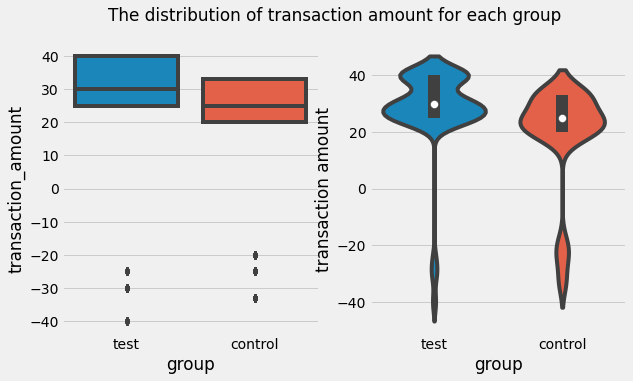

In [52]:
#Plot the viloins and the boxplots for each group
fig,ax=plt.subplots(1,2,sharey=False,figsize=(9,5))
sns.boxplot(x="group",y="transaction_amount",data=df_clean_nodup,ax=ax[0])
sns.violinplot(x='group',y="transaction_amount",data=df_clean_nodup,ax=ax[1])
ax[1].set_ylabel("transaction amount")
plt.suptitle('The distribution of transaction amount for each group');

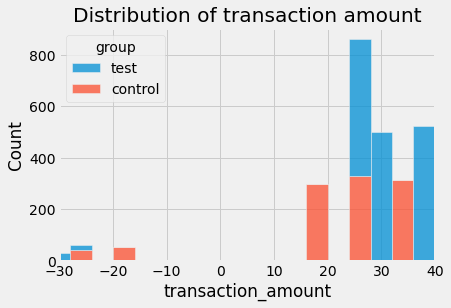

In [53]:
sns.histplot(x='transaction_amount',data=df_clean_nodup,hue='group',bins=20,multiple='stack')
plt.xlim([-30,40])
plt.title('Distribution of transaction amount');

The above graphs show clearly the difference in the average revenue between two groups. They support our conclusion of rejecting the null hypothesis. Our conclusion of rejecting the null hypothesis can be reinforced more by a linear regression approach (see the code below)

In [54]:
#Regression analysis
df_reg=df_clean_nodup.copy()
df_reg['intercept']=1
df_reg['test']=pd.get_dummies(df_reg['group'])['test'] #We chose only one column to
#avoid multicollinearity
model=sm.OLS(df_reg['transaction_amount'],df_reg[['intercept','test']]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     transaction_amount   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     205.6
Date:                Mon, 27 Jun 2022   Prob (F-statistic):           5.35e-45
Time:                        12:18:17   Log-Likelihood:                -11409.
No. Observations:                2714   AIC:                         2.282e+04
Df Residuals:                    2712   BIC:                         2.283e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     19.4345      0.493     39.394      0.000      18.467      20.402
test           9.1136      0.636     14.338      0.000       7.867      10.360
==============================================================================
Omnibus:                     1390.430   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7162.845
Skew:                          -2.514   Prob(JB):                         0.00
Kurtosis:                       9.169   Cond. No.                         2.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The above summary shows that that there is an association between the variables `transaction_amount` and the `group`. In fact, if we introduce the following hypothesis:

$H_{0}:b_{1}=0 \hspace{3cm} H_{1}: b_{1}\neq 0$

where $b_{1}$ is the coefficient in front of the variable `test` in our linear regression model, then we reject the null hypothesis at the level of significance $\alpha=0.05$ (pvalue. This means that the association (correlation) between the variables `transaction_amount` and the `group`is statistically significant.


### Conclusion for Question 3:
* The statisitcal methods that we implemented above show clearly that there is a statistically significant difference in the revenue between two groups. In fact, there is a strong evdence that the customers who can cancell the serevice by calling the customer line service bring more revenue.
* We could also use the permutation test to check our hypothesis but this path will not be taken here.
* The data seems to appear skewed. We might have skewed our data during the process of cleaning it.

### Question 4

Is a user that must call-in more likely to produce a higher chargeback rate (CHARGEBACKs/REBILLs)?

**Plan to tackle this question:**
* Come up with correct metric which will help us answer the question
* Rephrase the question in terms of hypotheses testing
* Use statistical tools to check the hypotheses

**Note.** We will use the bootstrap approach to answer this question

### Answer to question 4
* Metric= $\frac{\text{number of chargebacks}}{\text{number of rebills}}$

Let 

$r_{c}$=chargeback rate for the control group

$r_{t}$=chargeback rate for the test group

* Hypothesis formulation:

$H_{0}: r_{c}\leq r_{t} \hspace{3cm} H_{1}: r_{t}>r_{c}$



### Bootstrap approach

1. Find $r_{c}$ and $r_{t}$ under $H_{0}$
2. Resample data from each group and compute the simulated $r_{c}$, $r_{t}$ and their difference
3. Repeat step 2 $N$ times and store $r_{t}-r_{c}$ in `rate_diff`
4. Compute the actual diffirence between two groups and the $p$-value  
5.  Draw the conclusions at the level of significance $\alpha=0.05$




**Compute first p_reb, p_char under $H_{0}$**

In [55]:
p_reb=(df_clean_nodup.transaction_type=='rebill').mean()
p_char=(df_clean_nodup.transaction_type=='chargeback').mean()

In [56]:
def get_simul(test_size,control_size,N,prob):
    """This function returns simulated r_t and r_c"""
    test_simul=np.random.choice(['rebill','chargeback','other'],size=(test_size,N),p=prob)
    control_simul=np.random.choice(['rebill','chargeback','other'],size=(control_size,N),p=prob)
    r_t=(test_simul=='chargeback').sum(axis=0)/(test_simul=='rebill').sum(axis=0)
    r_c=(control_simul=='chargeback').sum(axis=0)/(control_simul=='rebill').sum(axis=0)
    return r_t,r_c

In [57]:
test_size=(df_clean_nodup['group']=='test').sum()
control_size=(df_clean_nodup['group']=='control').sum()
prob=[p_reb,p_char,1-(p_reb+p_char)]
r_t,r_c=get_simul(test_size,control_size,N=10000,prob=prob)

In [58]:
rate_diff=r_t-r_c


In [59]:
#Let's compute the actual difference
numerator_test=(df_clean_nodup.query('group=="test"')['transaction_type']=='chargeback').sum()
denom_test=(df_clean_nodup.query('group=="test"')['transaction_type']=='rebill').sum()
num_control=(df_clean_nodup.query('group=="control"')['transaction_type']=='chargeback').sum()
denom_control=(df_clean_nodup.query('group=="control"')['transaction_type']=='rebill').sum()
act_diff=numerator_test/denom_test-num_control/denom_control

In [60]:
#Compute the p-value
pval=(rate_diff>act_diff).mean()
alpha=0.05
print(f'The p-value is {pval}')
if pval<alpha:
    print('We reject the null hypothesis')
else:
    print('We failed to reject the null hypothesis')

The p-value is 1.0
We failed to reject the null hypothesis


### Conclusion for Question 4:
* We failed to reject the null hypothesis. In fact the p-value is very high, it is equal to one.
* The analysis would be slightly different if we did the cleaning of the data differently

### Note.
* After contacting a company for more information about the data, I understood that the assumption that I did for the data (one billing cycle) is not the one to proceed with my analysis.

* I would try to clean the data differently: I would consider finding records in the data with multiple refunds or chargebacks and consider those sample id's as duplicate entries.

* Then, for question 1, I would first find the number of rebills for every sample id and then my metric would would the average of rebills per sample_id. For the second question,for example, I would find the revenue for each sample id by adding the transaction amounts from different transaction types of each sample id. My metric would the average revenue per sample id. In other words, I would use the groupby method on df_clean to get a new dataframe having the revenue for each sample id and then I would join (inner) this new dataframe with the table that has the group assignment for each sample id then my metric would be the average revenue per sample id. However, due to time constrains, I will not get into the details of this analysis.